In [1]:
import sys
import os
import csv
import shutil
from collections import defaultdict

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import Perceptron
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.datasets import load_files
from sklearn.model_selection import train_test_split
from sklearn import metrics
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

source_path = 'datasets'
source_file = '2017 Actuals.csv'
target_path = 'payees'


# Load payee data in directories

In [43]:

# with open(os.path.join(source_path,source_file), mode='r') as csvfile:
#     reader = csv.reader(csvfile, delimiter=',')
#     cnt = 0
    
#     for row in reader:
#         if first:
#             first = False
#             continue
        
#         outdir = row[1]
#         if not os.path.isdir(os.path.join(target_path,outdir)):
#             os.mkdir(os.path.join(target_path,outdir))
            
#         with open(os.path.join(target_path,outdir,'payee{:04d}.txt'.format(cnt)), mode='w') as payee_file:
#             payee_file.write(row[0])
            
#         cnt += 1


# Classify payee data

In [8]:
    dataset = load_files(target_path, shuffle=False)
    print('n_samples {}'.format(len(dataset.data)))

    # split the dataset in training and test set:
    docs_train, docs_test, y_train, y_test = train_test_split(
        dataset.data, dataset.target, test_size=0.25, random_state=None)

    # TASK: Build a vectorizer / classifier pipeline that filters out tokens
    # that are too rare or too frequent
    clf = Pipeline([
        ('vect',TfidfVectorizer(analyzer='character')),
        ('clf', Perceptron())
    ])

    # TfidfVectorizer().get_params()
    # TASK: Build a grid search to find out whether unigrams or bigrams are
    # more useful.
    # Fit the pipeline on the training set using grid search for the parameters
    parameters = {
        'vect__ngram_range': [(1, 1), (1, 3), (1,5)],
        'vect__analyzer': ['char','word']
    }
    gs_clf = GridSearchCV(clf, parameters, n_jobs=-1)
    cclf = gs_clf.fit(docs_train, y_train)

# TASK: Fit the pipeline on the training set
#clf.fit(docs_train, y_train)


n_samples 1774


/Applications/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)
/Applications/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/Applications/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both

/Applications/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/Applications/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


{'vect__analyzer': 'char', 'vect__ngram_range': (1, 5)}
0.900900900901
                  precision    recall  f1-score   support

            Auto       0.94      0.70      0.80        23
        Business       0.57      1.00      0.73         4
            Cash       0.17      1.00      0.29         1
         Charity       0.89      0.94      0.91        17
        Clothing       0.83      0.45      0.59        11
        Computer       1.00      0.50      0.67         2
          Dining       0.90      0.97      0.93       117
   Entertainment       1.00      0.69      0.82        13
           Fixed       0.91      1.00      0.95        21
           Gifts       0.00      0.00      0.00         1
       Groceries       0.97      1.00      0.99       103
       Household       0.91      0.74      0.82        39
       Kid Stuff       1.00      0.86      0.92         7
         Medical       0.60      0.75      0.67         8
           Music       1.00      1.00      1.00        28


/Applications/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Applications/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


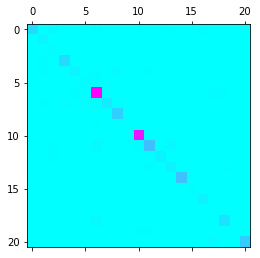

In [9]:
# TASK: Predict the outcome on the testing set in a variable named y_predicted
y_predicted = gs_clf.predict(docs_test)

print(gs_clf.best_params_)
print(cclf.score(docs_test, y_test))

# Print the classification report
print(metrics.classification_report(y_test, y_predicted,
                                    target_names=dataset.target_names))

# Plot the confusion matrix
cm = metrics.confusion_matrix(y_test, y_predicted)
print(cm)

plt.matshow(cm, cmap=plt.cm.cool)
plt.show()


In [32]:
# Predict the result on some short new sentences:
test_payees = [
    u'McDonalds',
    u'PotBelly',
    u'Similan',
    u'Water',
]
predicted = clf.predict(test_payees)

for s, p in zip(test_payees, predicted):
    print(u'The class of {} is {}'.format(s, dataset.target_names[p]))


The class of McDonalds is Dining
The class of PotBelly is Dining
The class of Similan is Dining
The class of Water is Fixed


In [13]:
bank = {
    'chase': '/Users/jasonweil/Downloads/Chase3686_Activity_20180728.CSV',
    'alaska' : '/Users/jasonweil/Documents/Financials/Budgets/Alaska 2018 H1.csv',
    'citi': '/Users/jasonweil/Documents/Financials/Budgets/Citi 2018 H1.csv'
}
workdir = '/Users/jasonweil/Documents/Financials/Budgets/'#'/Users/jasonweil/Downloads'
work_csv = 'Alaska 2018 H1.csv'#'Chase3686_Activity_20180728.CSV'
first = True

transactions = pd.read_csv(bank['citi'],index_col=False)
payees = transactions['Description']
        
transactions['Class'] = [dataset.target_names[x] for x in gs_clf.predict(payees)]
transactions.to_csv('/Users/jasonweil/Documents/Financials/Budgets/Citi classified 2018 H1.csv')
# display(transactions)

In [15]:
transactions = pd.read_csv('/Users/jasonweil/Documents/Financials/Budgets/2018 H1.csv',index_col=False)
transactions.groupby('Class')['Amount'].sum()/6
transactions.groupby('Class').agg({'Amount':sum})/6

,Amount
Class,
Auto,-357.938333
Business,-58.590000
Cash,-158.791667
Charity,-257.338333
Clothing,-402.830000
Computer,-7.736667
Dining,-739.878333
Entertainment,-266.063333
Fixed,-3250.858333
